In [ ]:
!git clone https://github.com/fchollet/ARC-AGI.git

In [14]:
import os
import json
import shutil
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(
    ['#FFFFFF', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

def load_tasks():
    base_path = 'ARC-AGI/data'

    folders_data = []
    for folder in ["evaluation", "training"]:
        folder_tasks = sorted(os.listdir(f"{base_path}/{folder}"))
        folder_data = []
        for task in folder_tasks:
            with open(f"{base_path}/{folder}/{task}", "r") as f:
                task_data = json.load(f)
                task_data['id'] = task
                folder_data.append(task_data)
        folders_data.append(folder_data)
    return folders_data

def plot_task(task, save_path=None):
    """Plots training examples and test pair with predicted output for an ARC task"""    
    
    num_train = len(task['train'])
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_train + num_test, figsize=(3*(num_train+num_test), 3*2))
    plt.suptitle(f'Task ID: {task["id"]}', fontsize=20, fontweight='bold', y=1)
    
    # Plot training examples
    for j in range(num_train):     
        plot_one(task['train'][j]['input'], axs[0, j], 'train input')
        plot_one(task['train'][j]['output'], axs[1, j], 'train output')        
    
    for j in range(num_test):
        # Plot test input and predicted output
        plot_one(task['test'][j]['input'], axs[0, num_train + j], 'test input')
        plot_one(task['test'][j]['output'], axs[1, num_train + j], 'test output')

    # Style the figure
    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()  # Close the figure to free memory
    else:
        plt.show()
    
def plot_one(matrix, ax, title):
    """Plots a single grid from the ARC task"""
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='black', linewidth=0.5)
    
    ax.set_xticks([x-0.5 for x in range(1 + len(matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_title(title)

In [ ]:
evaluation_tasks, training_tasks = load_tasks()

In [7]:
evaluation_tasks[0]

{'train': [{'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]},
  {'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]}],
 'test': [{'input': [[3, 2], [7, 8]],
   'output': [[3, 2, 3, 2, 3, 2],
    [7, 8, 7, 8, 7, 8],
    [2, 3, 2, 3, 2, 3],
    [8, 7, 8, 7, 8, 7],
    [3, 2, 3, 2, 3, 2],
    [7, 8, 7, 8, 7, 8]]}],
 'id': '00576224.json'}

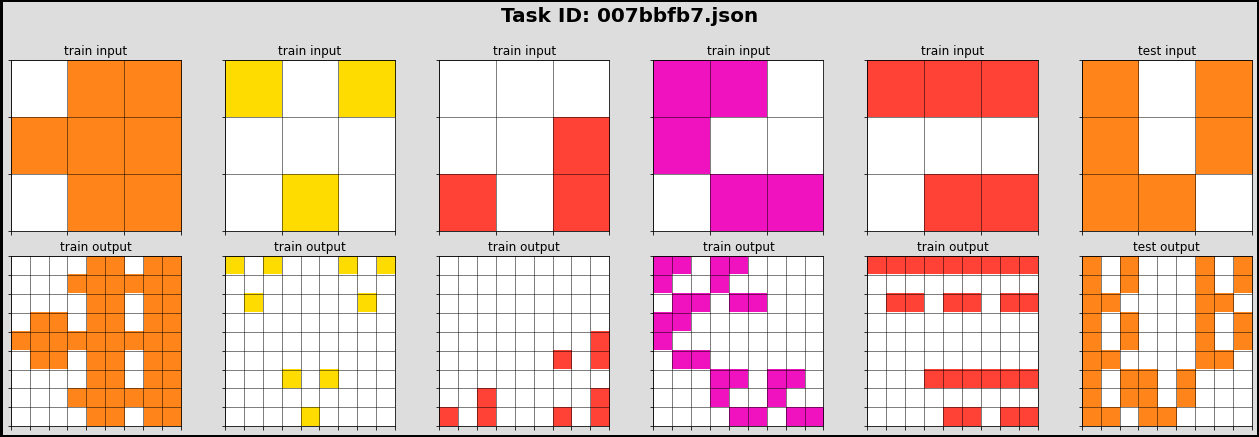

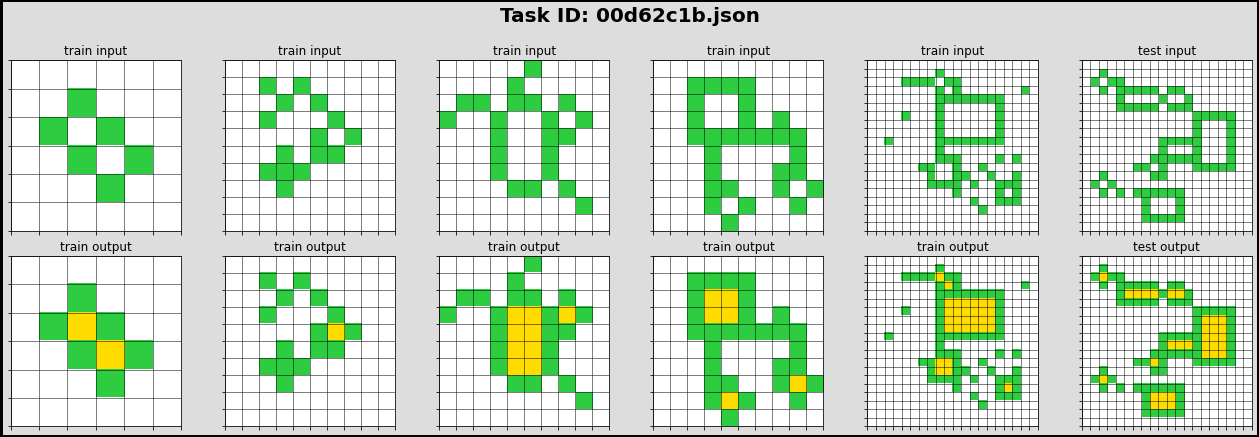

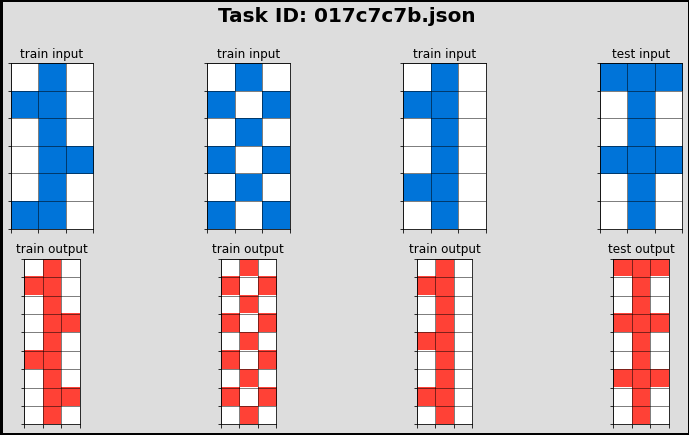

In [10]:
for task in training_tasks[:3]:
    plot_task(task)

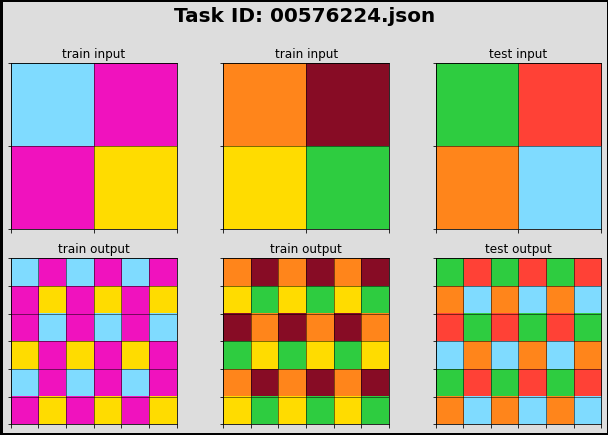

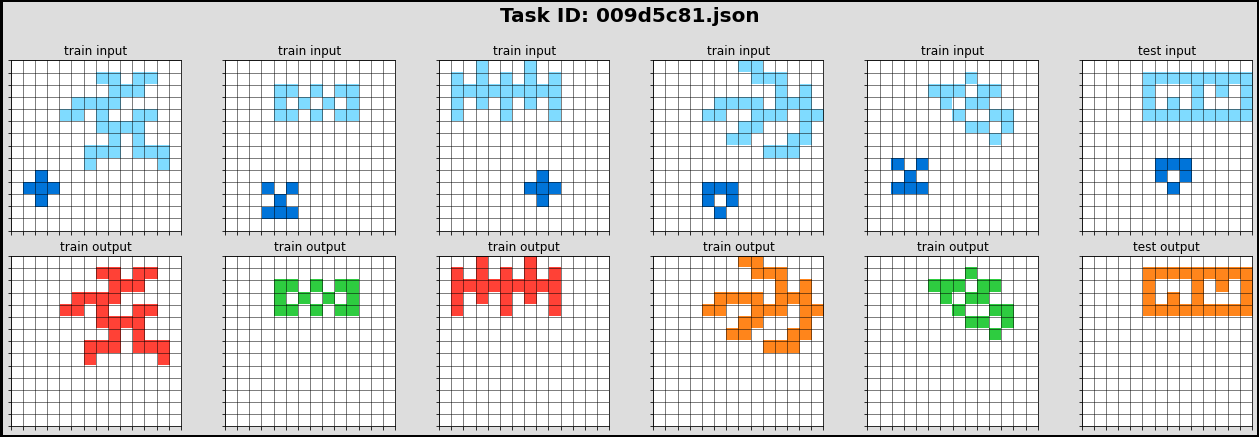

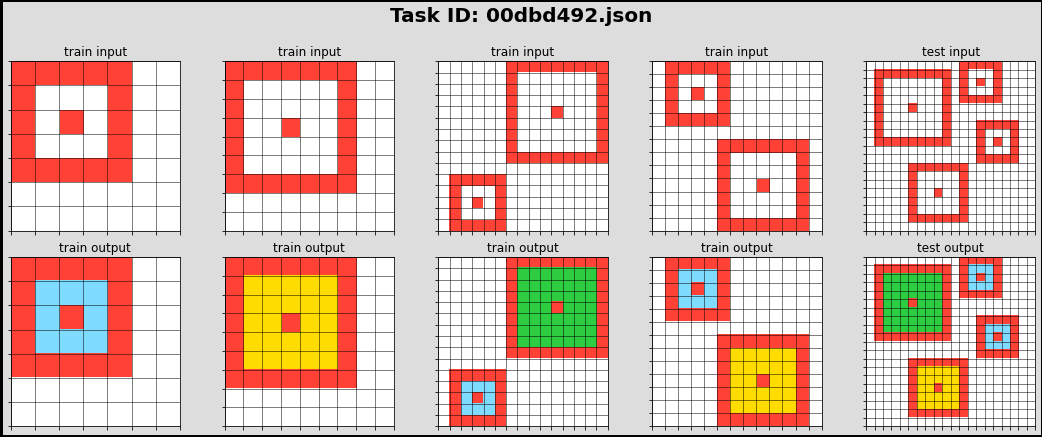

In [11]:
for task in evaluation_tasks[:3]:
    plot_task(task)

In [13]:
def save_all_visuals():
    training_data, evaluation_data = load_tasks()
    save_dir = "arc-visuals"
    # shutil.rmtree(save_dir, ignore_errors=True)
    os.makedirs(save_dir, exist_ok=True)
    for folder, data in [("training", training_data), ("evaluation", evaluation_data)]:
        os.makedirs(f"{save_dir}/{folder}", exist_ok=True)
        for i, task in enumerate(data):
            task_id = task['id'].replace('.json', '')
            save_path = f"{save_dir}/{folder}/{task_id}.png"
            if folder == "evaluation" and i >= 300:
                if os.path.exists(save_path):
                    print(f'[test data - {i}] Deleting {save_path} as it exists')
                    os.remove(save_path)
                    continue
                else:
                    print(f'[test data - {i}] Skipping {save_path}')
                    continue

           
            if os.path.exists(save_path):
                print(f'[{folder}-{i}] Skipping {save_path} as it already exists')
                continue
            print(f'[{folder}-{i}/{len(data)}] Saving {save_path}')
            plot_task(task, save_path)
    print(f'Saved {len(training_data)} training and {len(evaluation_data)} evaluation visuals')


save_all_visuals()

[training-0/400] Saving arc-visuals/training/00576224.png
[training-1/400] Saving arc-visuals/training/009d5c81.png
[training-2/400] Saving arc-visuals/training/00dbd492.png
[training-3/400] Saving arc-visuals/training/03560426.png
[training-4/400] Saving arc-visuals/training/05a7bcf2.png
[training-5/400] Saving arc-visuals/training/0607ce86.png
[training-6/400] Saving arc-visuals/training/0692e18c.png
[training-7/400] Saving arc-visuals/training/070dd51e.png
[training-8/400] Saving arc-visuals/training/08573cc6.png
[training-9/400] Saving arc-visuals/training/0934a4d8.png
[training-10/400] Saving arc-visuals/training/09c534e7.png
[training-11/400] Saving arc-visuals/training/0a1d4ef5.png
[training-12/400] Saving arc-visuals/training/0a2355a6.png
[training-13/400] Saving arc-visuals/training/0b17323b.png
[training-14/400] Saving arc-visuals/training/0bb8deee.png
[training-15/400] Saving arc-visuals/training/0becf7df.png
[training-16/400] Saving arc-visuals/training/0c786b71.png
[traini

In [16]:
evaluation_tasks, training_tasks = load_tasks()

In [36]:
# for task in training_tasks[:10]:
#     plot_task(task)

In [37]:
TEMPLATE = """Find the common rule that maps an input grid to an output grid, given the examples below.

{examples}

Below is a test input grid. Predict the corresponding output grid by applying the rule you found. Your final answer should just be the text output grid itself.

Input:
{input}
"""
def task_to_prompt(task):
    examples = "\n".join([f"Example {i+1}:\nInput:\n{task['train'][i]['input']}\nOutput:\n{task['train'][i]['output']}" for i in range(len(task['train']))])
    return TEMPLATE.format(input=task['test'][0]['input'], examples=examples)

In [38]:
task = training_tasks[9]
prompt = task_to_prompt(task)
print(prompt)

Find the common rule that maps an input grid to an output grid, given the examples below.

Example 1:
Input:
[[0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 5, 0, 5, 0, 5, 0, 0, 0], [0, 5, 0, 5, 0, 5, 0, 0, 0], [0, 5, 0, 5, 0, 5, 0, 0, 0], [0, 5, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 5, 0, 5, 0]]
Output:
[[0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 2, 0, 0, 0, 1, 0, 0, 0], [0, 2, 0, 0, 0, 1, 0, 0, 0], [0, 2, 0, 3, 0, 1, 0, 0, 0], [0, 2, 0, 3, 0, 1, 0, 0, 0], [0, 2, 0, 3, 0, 1, 0, 0, 0], [0, 2, 0, 3, 0, 1, 0, 4, 0], [0, 2, 0, 3, 0, 1, 0, 4, 0], [0, 2, 0, 3, 0, 1, 0, 4, 0]]
Example 2:
Input:
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0], [0, 0, 0, 5, 0, 5, 0, 5, 0], [0, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 5, 0, 5, 0]]
Output:
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0,

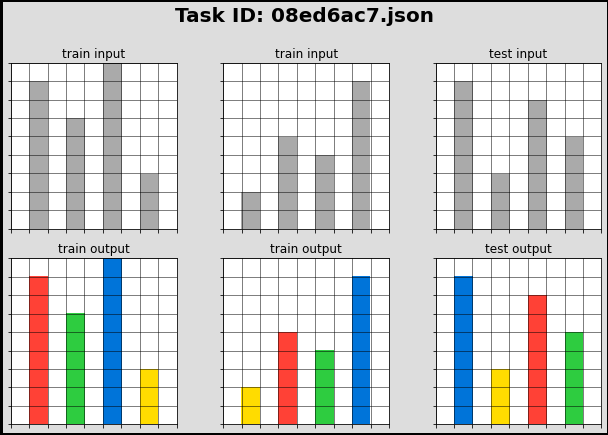

In [35]:
plot_task(task)